# Movie Recommendation Exploratory Data Analysis

## Introduction

We are given a dataset from Kaggle called [Movie Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset). This document contains 45,000 movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters release dates language, production companies, contries, TMBD vote counts, and vote averages. 

The Movie Dataset has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5.

Our goal for this project is to create a search engine where the user can search for keywords and our model will give recommendations based on the keywords




Team Members:



*   *Samuel Adeleye*
*   *Nasir Barnes*
*   *Jermaine Lennon*
*   *Antoine Teague*


## Creating DataFrames

### Installing Kaggle API

The imports we will use to install the data

In [91]:
# Imports 
from google.colab import files
import zipfile
import os
import pandas as pd
import numpy as np
import seaborn as sns

# Import for Visualization 
import matplotlib.pyplot as plt # graphically presentation of dataset

# Import for Count and Percent Graphs
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

Install your kaggle json file

In [47]:
!pip install -U -q kaggle
!mkdir  /root/.kaggle

# Upload kdggle.json api
files.upload()
!cp kaggle.json /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Saving kaggle.json to kaggle (1).json


### Dowloading Data


Downloading data from [Kaggle](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)

In [48]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

 92% 210M/228M [00:01<00:00, 210MB/s]
100% 228M/228M [00:01<00:00, 208MB/s]


In [49]:
!chmod 600 /root/.kaggle/kaggle.json

This code allows us to unzip the file and remove it from this notebooks files


In [50]:
!apt install pv
!unzip -o /content/the-movies-dataset.zip  | pv -l >/dev/null


Reading package lists... Done
Building dependency tree       
Reading state information... Done
pv is already the newest version (1.6.6-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
8.00  0:00:19 [ 420m/s] [    <=>                                               ]


In [51]:
os.remove('the-movies-dataset.zip')

### Creating DataFrames

Imports we used to create dataframe

In [52]:
# Imports
import pandas as pd


In [53]:
# In this code block we will create the dataframes for each file
credits = pd.read_csv('credits.csv', engine= 'python', encoding= 'utf-8', error_bad_lines= False)
movie = pd.read_csv('movies_metadata.csv')
keywords = pd.read_csv('keywords.csv')
links = pd.read_csv('links.csv')
links_small = pd.read_csv('links_small.csv') 
ratings = pd.read_csv('ratings.csv')
ratings_small = pd.read_csv('ratings_small.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.



In [54]:
df = movie.copy()
#show the head 
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [55]:
df.shape


(45466, 24)

In [56]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [57]:
print("\n\nShape: ", movie.shape, "\n\n")
#dfmetadata_recreated.drop(dfmetadata_recreated[dfmetadata_recreated['id'].str.contains('-')].index, inplace=True)
movie['belongs_to_collection'] = '[' + movie['belongs_to_collection'] + ']'

print("---- BEFORE ----")
print(movie.isna().sum())
movie.fillna('unknown', inplace=True)

print("---- AFTER ----")
print(movie.isna().sum())

movie



Shape:  (45466, 24) 


---- BEFORE ----
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64
---- AFTER ----
adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
imdb_id                

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"[{'id': 10194, 'name': 'Toy Story Collection',...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,unknown,Toy Story,False,7.7,5415.0
1,False,unknown,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",unknown,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"[{'id': 119050, 'name': 'Grumpy Old Men Collec...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",unknown,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,unknown,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",unknown,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"[{'id': 96871, 'name': 'Father of the Bride Co...",0,"[{'id': 35, 'name': 'Comedy'}]",unknown,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,unknown,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,unknown,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,unknown,0,"[{'id': 18, 'name': 'Drama'}]",unknown,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,unknown,Century of Birthing,False,9.0,3.0
45463,False,unknown,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",unknown,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,unknown,0,[],unknown,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,unknown,Satan Triumphant,False,0.0,0.0


In [58]:
selected_features = ['adult', 'title', 'original_title', 'belongs_to_collection', 'genres', 'spoken_languages', 'production_companies', 
                     'production_countries', 'original_language', 'overview', 'popularity', 'poster_path', 'release_date', 'budget', 
                     'revenue', 'runtime', 'status', 'tagline', 'video', 'vote_average', 'vote_count']#, 'year', 'month', 'day']
selected_features

['adult',
 'title',
 'original_title',
 'belongs_to_collection',
 'genres',
 'spoken_languages',
 'production_companies',
 'production_countries',
 'original_language',
 'overview',
 'popularity',
 'poster_path',
 'release_date',
 'budget',
 'revenue',
 'runtime',
 'status',
 'tagline',
 'video',
 'vote_average',
 'vote_count']

In [59]:
movie = movie[['id'] + selected_features]
print("Shape: ", movie.shape)
print("\n", movie.isna().sum(), "\n", movie.info())

Shape:  (45466, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     45466 non-null  object
 1   adult                  45466 non-null  object
 2   title                  45466 non-null  object
 3   original_title         45466 non-null  object
 4   belongs_to_collection  45466 non-null  object
 5   genres                 45466 non-null  object
 6   spoken_languages       45466 non-null  object
 7   production_companies   45466 non-null  object
 8   production_countries   45466 non-null  object
 9   original_language      45466 non-null  object
 10  overview               45466 non-null  object
 11  popularity             45466 non-null  object
 12  poster_path            45466 non-null  object
 13  release_date           45466 non-null  object
 14  budget                 45466 non-null  object
 15 

In [73]:
movie.drop(movie[movie['release_date'].isna()].index, inplace=True)
movie.drop(movie[~movie['release_date'].str.contains('-')].index, inplace=True)

movie['year'] = movie['release_date'].str.split('-').str[0].astype(int)
movie['month'] = movie['release_date'].str.split('-').str[1].astype(int)
movie['day'] = movie['release_date'].str.split('-').str[2].astype(int)
movie['day_name'] = pd.to_datetime(movie['release_date']).dt.day_name()
movie.drop(['release_date'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

## EDA

**How many movies are considered adult films**

In [60]:
movie.drop(movie[(movie['adult'] != 'False') & (movie['adult'] != 'True')].index, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
movie['adult'].value_counts()


False    45454
True         9
Name: adult, dtype: int64

**Status of Movies**

In [62]:
print("Total Number of Movies: ", len(movie['status']))
print("\n")
print("-"*5, " Movies Status Statics ", "-"*5)
movie['status'].value_counts()

Total Number of Movies:  45463


-----  Movies Status Statics  -----


Released           45014
Rumored              230
Post Production       98
unknown               84
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

**Functions**

In [63]:
import ast
def getDataList(df, xfeature):
    xlst = []
    for x, xRows in df.iterrows():
        target_column = xRows[xfeature]
        if (target_column != 'unknown'):
            strName = ast.literal_eval( target_column )
            for i in strName:
                if(i['name'] != ''):
                    xlst.append(i['name'])
        else:
            xlst.append('unknown')
    return xlst

In [64]:
# Create Function for PIE Graph
def myPieChart(df, xName, lblName, myTitle, myXplode, rotlbl):
    x = df[xName]
    labels = lblName

    fig, ax = plt.subplots(figsize=(8, 8))
    patches, texts, pcts = ax.pie(
        x, labels = labels, autopct='%.1f%%',
        wedgeprops = {'linewidth': 3.0, 'edgecolor': 'white'},
        textprops = {'size': 'small', 'weight':400},
        labeldistance = 1.04,
        startangle = 90)
    
    # Set corresponding label color
    for i, patch in enumerate(patches):
        texts[i].set_color(patch.get_facecolor())
        texts[i].set_fontsize(12)

    plt.setp(pcts, color='white')
    plt.setp(texts, fontweight=600)
    ax.set_title(myTitle, fontsize=15, color= 'green', fontweight='bold')
        
    plt.tight_layout()

**Movie Languages**

In [65]:
movie_original_lang = pd.DataFrame(columns={'name', 'count'})
movie_original_lang['name'] = movie['original_language'] # Add Data from list to name column
print("\nDataset Shape: ", movie_original_lang.shape ) # Shape of Dataset

movie_original_lang = movie_original_lang.groupby('name').agg({'count': 'size'}).reset_index().sort_values('count', ascending=False)
print("\nDataset Shape: ", movie_original_lang.shape ) # Shape of Dataset
movie_original_lang.head()


Dataset Shape:  (45463, 2)

Dataset Shape:  (90, 2)


,name,count
17,en,32269
24,fr,2438
34,it,1529
36,ja,1350
15,de,1080


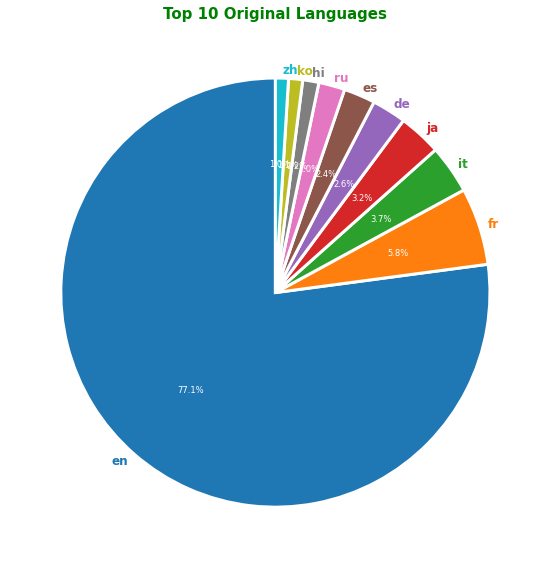

In [66]:
movie_original_lang = movie_original_lang.head(10)
myPieChart(movie_original_lang, 'count', movie_original_lang['name'], 'Top 10 Original Languages', '', True)

**Movie Genres**

In [67]:
getlist_genres = getDataList(movie, 'genres') # Call Function with required Parameter
print("\nLenght of List: ", len(getlist_genres) )

# Create New Dataset for Language
dfmovies_genres = pd.DataFrame(columns={'name', 'count'})
dfmovies_genres['name'] = getlist_genres # Add Data from list to name column
print("\nDataset Shape: ", dfmovies_genres.shape ) # Shape of Dataset

#dfmovies_genres.drop(dfmovies_genres[dfmovies_genres['name'] == 'unknown'].index, inplace=True)
dfmovies_genres = dfmovies_genres.groupby('name').agg({'count': 'size'}).reset_index().sort_values('count', ascending=False)
dfmovies_genres["percent"] = ((dfmovies_genres['count'] / len(getlist_genres)) * 100).round(2)
dfmovies_genres.head()


Lenght of List:  91094

Dataset Shape:  (91094, 2)


,name,count,percent
6,Drama,20265,22.25
3,Comedy,13182,14.47
17,Thriller,7624,8.37
14,Romance,6735,7.39
0,Action,6596,7.24


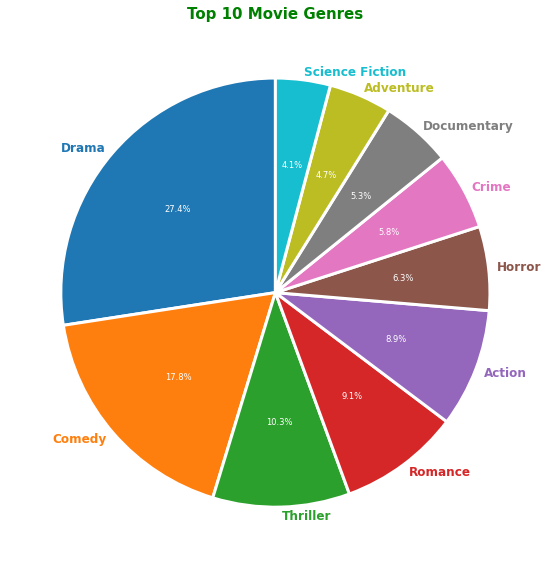

In [68]:
xdfmovies_genres = dfmovies_genres.head(10)
myPieChart(xdfmovies_genres, 'count', xdfmovies_genres['name'], 'Top 10 Movie Genres', '', True)

**Production Countries**

In [69]:
getlist_countries = getDataList(movie, 'production_countries') # Call Function with required Parameter
print("\nLenght of List: ", len(getlist_countries) )

# Create New Dataset for Countries
dfmovies_countries = pd.DataFrame(columns={'name', 'count'})
dfmovies_countries['name'] = getlist_countries # Add Data from list to name column
print("\nDataset Shape: ", dfmovies_countries.shape ) # Shape of Dataset

#dfmovies_genres.drop(dfmovies_genres[dfmovies_genres['name'] == 'unknown'].index, inplace=True)
dfmovies_countries = dfmovies_countries.groupby('name').agg({'count': 'size'}).reset_index().sort_values('count', ascending=False)
dfmovies_countries.head(10)


Lenght of List:  49426

Dataset Shape:  (49426, 2)


,name,count
153,United States of America,21153
151,United Kingdom,4094
50,France,3940
54,Germany,2254
70,Italy,2169
27,Canada,1765
72,Japan,1648
136,Spain,964
122,Russia,912
64,India,828


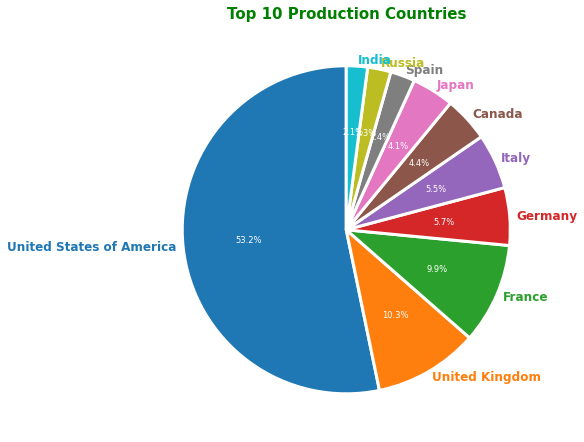

In [70]:
xdfmovies_countries = dfmovies_countries.head(10)
myPieChart(xdfmovies_countries, 'count', xdfmovies_countries['name'], 'Top 10 Production Countries', '', True)

In [74]:
dfmetadata_revenue = movie[ movie['revenue'] > 1000000][['revenue', 'year', 'month', 'day_name']]
xdf_revenue_year = dfmetadata_revenue.groupby(['year']).agg({'revenue':sum}).sort_values('revenue', ascending=False).reset_index()
xdf_revenue_month = dfmetadata_revenue.groupby(['month']).agg({'revenue':sum}).sort_values('revenue', ascending=False).reset_index()
xdf_revenue_dayname = dfmetadata_revenue.groupby(['day_name']).agg({'revenue':sum}).sort_values('revenue', ascending=False).reset_index()

**Revenue by Year**

In [77]:
figKill = [go.Bar(y = xdf_revenue_year['revenue'],
                     x = xdf_revenue_year['year'],
                     text = np.round(xdf_revenue_year['revenue']),
                     textposition = 'outside',
                     width = [0.7, 0.7],
                     marker = dict(color = 'lightblue',
                                   line_color = 'black',
                                   line_width = 2))]

layout = go.Layout(title= 'Movies Revenue Earned Per Year',
                   xaxis = dict(title = 'Year'),
                   yaxis = dict(title = 'Revenue Earned'),
                   width = 1000,
                   height = 600,
                   template = 'plotly_white')

fig1 = go.Figure(data = figKill, layout = layout)
iplot(fig1)

**Revenue by Month**

In [78]:
figKill = [go.Bar(y = xdf_revenue_month['revenue'],
                     x = xdf_revenue_month['month'],
                     text = np.round(xdf_revenue_month['revenue']),
                     textposition = 'outside',
                     width = [0.7, 0.7],
                     marker = dict(color = 'lightblue',
                                   line_color = 'black',
                                   line_width = 2))]

layout = go.Layout(title= 'Monthly Revenue Earned by Movies',
                   xaxis = dict(title = 'Months'),
                   yaxis = dict(title = 'Revenue'),
                   width = 900,
                   height = 600,
                   template = 'plotly_white')

fig1 = go.Figure(data = figKill, layout = layout)
iplot(fig1)

**Popularity**

In [83]:
movie[['title', 'popularity', 'year']].sort_values(['year', 'popularity'], ascending=False).head(7)

,title,popularity,year
26559,Avatar 2,6.020055,2020
38130,Mary Shelley,3.328261,2018
33359,Iron Sky: The Coming Race,1.917649,2018
38885,The Other Side of the Wind,0.238154,2018
44535,Mobile Homes,0.155147,2018
30402,Bad Boys for Life,2.178546,2018
35694,The Devil's Candy,9.968649,2017


In [84]:
movie[['title', 'vote_count', 'year']].sort_values(['vote_count'], ascending=False).head(10)


,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


**Budget and Revenue for Movie**

In [85]:
dfmovies_cost = movie[(movie['budget'] != 'unknown') & 
                                     (movie['revenue'] != 'unknown') ][['title', 'budget', 'revenue', 'year']]

dfmovies_cost['budget'] = dfmovies_cost['budget'].astype(int)
dfmovies_cost['revenue'] = dfmovies_cost['revenue'].astype(int)

print("Shape: ", dfmovies_cost.shape)
dfmovies_cost.info()

Shape:  (45376, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45376 entries, 0 to 45465
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    45376 non-null  object
 1   budget   45376 non-null  int64 
 2   revenue  45376 non-null  int64 
 3   year     45376 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ MB


In [86]:
dfmovies_cost = dfmovies_cost[(dfmovies_cost['budget'] > 1000000 ) &
                              (dfmovies_cost['revenue'] > 1000000 ) ][['title', 'budget', 'revenue', 'year']]
print("Shape: ", dfmovies_cost.shape)
dfmovies_cost

Shape:  (4589, 4)


,title,budget,revenue,year
0,Toy Story,30000000,373554033,1995
1,Jumanji,65000000,262797249,1995
3,Waiting to Exhale,16000000,81452156,1995
5,Heat,60000000,187436818,1995
8,Sudden Death,35000000,64350171,1995
...,...,...,...,...
45139,The Emoji Movie,50000000,66913939,2017
45167,Wind River,11000000,184770205,2017
45250,Sivaji: The Boss,12000000,19000000,2007
45412,Pro Lyuboff,2000000,1268793,2010


In [88]:
print("Top 10 Budget Movies")
dfmovies_cost.sort_values(['budget'], ascending=False).head(10)

Top 10 Budget Movies


,title,budget,revenue,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,2011
11827,Pirates of the Caribbean: At World's End,300000000,961000000,2007
26558,Avengers: Age of Ultron,280000000,1405403694,2015
11067,Superman Returns,270000000,391081192,2006
44842,Transformers: The Last Knight,260000000,604942143,2017
16130,Tangled,260000000,591794936,2010
18685,John Carter,260000000,284139100,2012
11780,Spider-Man 3,258000000,890871626,2007
21175,The Lone Ranger,255000000,89289910,2013
26567,Captain America: Civil War,250000000,1153304495,2016


In [89]:
print("Top 10 Revenue Earned Movies")
dfmovies_cost.sort_values(['revenue'], ascending=False).head(10)


Top 10 Revenue Earned Movies


,title,budget,revenue,year
14551,Avatar,237000000,2787965087,2009
26555,Star Wars: The Force Awakens,245000000,2068223624,2015
1639,Titanic,200000000,1845034188,1997
17818,The Avengers,220000000,1519557910,2012
25084,Jurassic World,150000000,1513528810,2015
28830,Furious 7,190000000,1506249360,2015
26558,Avengers: Age of Ultron,280000000,1405403694,2015
17437,Harry Potter and the Deathly Hallows: Part 2,125000000,1342000000,2011
22110,Frozen,150000000,1274219009,2013
42222,Beauty and the Beast,160000000,1262886337,2017


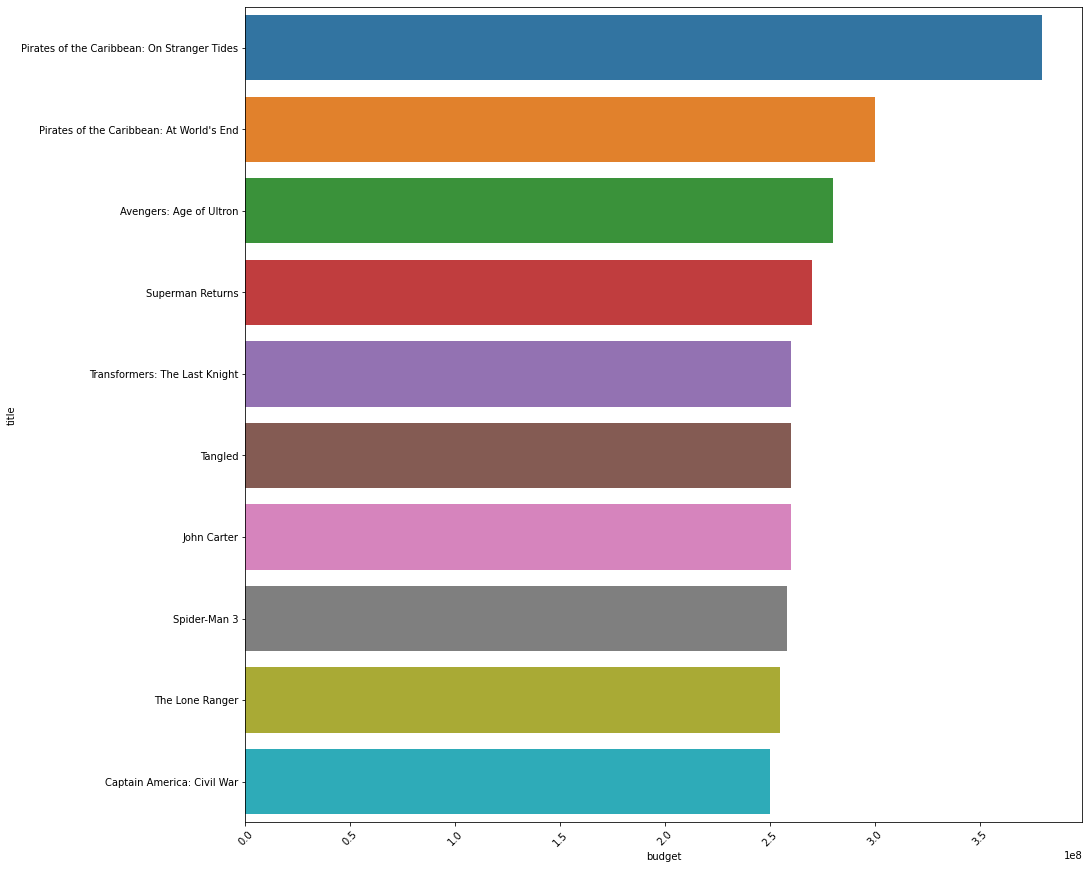

In [90]:
dfmoviesby_budget = dfmovies_cost.sort_values('budget', ascending=False)

plt.figure(figsize=(15,15))
sns.barplot(y='title', x='budget', data=dfmoviesby_budget.head(10) )
plt.xticks(rotation=45)
plt.show()

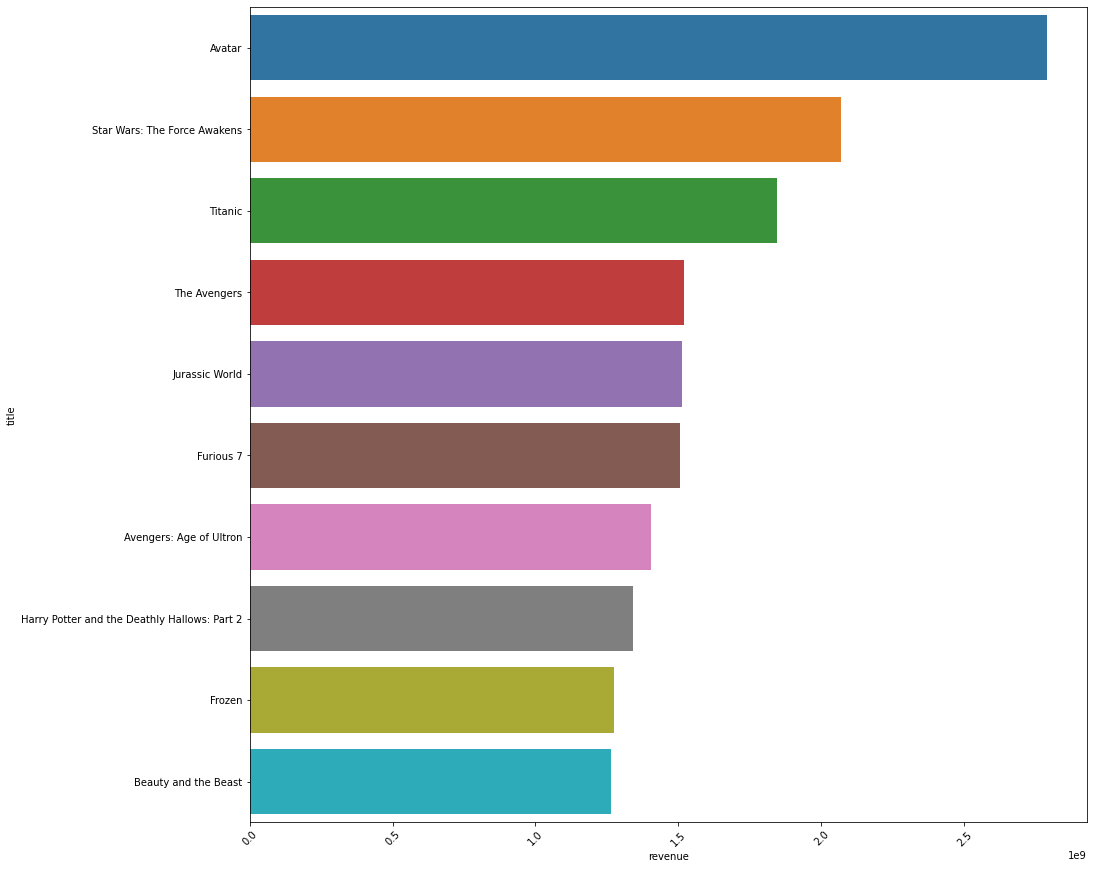

In [92]:
dfmoviesby_revenue = dfmovies_cost.sort_values('revenue', ascending=False)
dfmoviesby_revenue.head(3)

plt.figure(figsize=(15,15))
sns.barplot(y='title', x='revenue', data=dfmoviesby_revenue.head(10) )
plt.xticks(rotation=45)
plt.show()